In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

We did two diffraction experiments. One with a laser, and one with single photons from a low-power bulb. This draft report only has the laser data since we do not yet have bulb data.

In [93]:
# import laser diffraction data

dirpath = '/Users/asudler/Desktop/OU/coursework/2023/fall/PHYS-3302-ALAB1/two-slit/data/laser-runs/'
files = ['left_no_slit.csv', 'left_slit.csv', 'both_slit.csv', 'right_slit.csv', 'right_no_slit.csv']

pos = []
v1 = []
v2 = []
v3 = []
for i in range(len(files)):
    posh, v1h, v2h, v3h = np.genfromtxt(
        dirpath + files[i], unpack=True,
        skip_header=1, dtype=float,
        delimiter=','
    )
    pos.append(posh)
    v1.append(v1h)
    v2.append(v2h)
    v3.append(v3h)

pos = np.array(pos, dtype=object)
v1 = np.array(v1, dtype=object)
v2 = np.array(v2, dtype=object)
v3 = np.array(v3, dtype=object)

nlength = len(pos)

# also make pos in m instead of mm
pos = np.array([
    pos[i]/1000 for i in range(nlength)
], dtype=object)

In [94]:
# avg and get error on v
(v1[0] + v2[0] + v3[0])/3

array([0.008, 0.008, 0.008, 0.008, 0.008, 0.008, 0.008, 0.008, 0.008,
       0.008, 0.008, 0.008, 0.008, 0.008, 0.008, 0.008, 0.008, 0.008,
       0.011, 0.016, 0.02 ])

In [95]:
# avg v
vavg = np.array([
    (v1[i] + v2[i] + v3[i])/3
    for i in range(nlength)
], dtype=object)

# std v, which we use later for error bars
vstd = np.array([
    np.array([
        np.std(
            np.array([v1[j][i],v2[j][i],v3[j][i]])
        )
        for i in range(len(v1[j]))
    ])
    for j in range(nlength)
], dtype=object)

In [96]:
# print stdv
print(vstd)

[array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 1.73472348e-18, 0.00000000e+00,
        0.00000000e+00])
 array([0.00424264, 0.00141421, 0.00163299, 0.00471405, 0.00094281,
        0.00478423, 0.01049868, 0.01319933, 0.01973716, 0.02151485,
        0.01956755, 0.02471167, 0.02135416, 0.01796292, 0.01687207,
        0.01067708, 0.00590668, 0.00244949, 0.0004714 , 0.        ,
        0.0008165 , 0.00094281, 0.00374166, 0.0074087 , 0.01104536,
        0.01027402])
 array([0.0004714 , 0.0004714 , 0.0004714 , 0.01061446, 0.0004714 ,
        0.00124722, 0.        , 0.00432049, 0.0046428 , 0.0020548 ,
        0.02166923, 0.02041786, 0.01885618, 0.01132353, 0.010873  ,
        0.02577251, 0.02389328, 0.15813145, 0.0587

In [97]:
# notice that there are several instances where all three measurements are the same,
# i.e. vstd = 0. but this does not mean there was no error in the measurement
# for our error bars, we will need to replace the 0-valued data with half of
# the value of the last digit on our measuring device. the voltmeter could measure
# up to the thousandths place (e.g. 1.969V), so there is a measurement error of
# +/- 0.0005V. 

verr = np.array([
    np.array([
        vstd[j][i]
        if vstd[j][i] != 0
        else 0.0005
        for i in range(len(vstd[j]))
    ])
    for j in range(nlength)
], dtype=object)

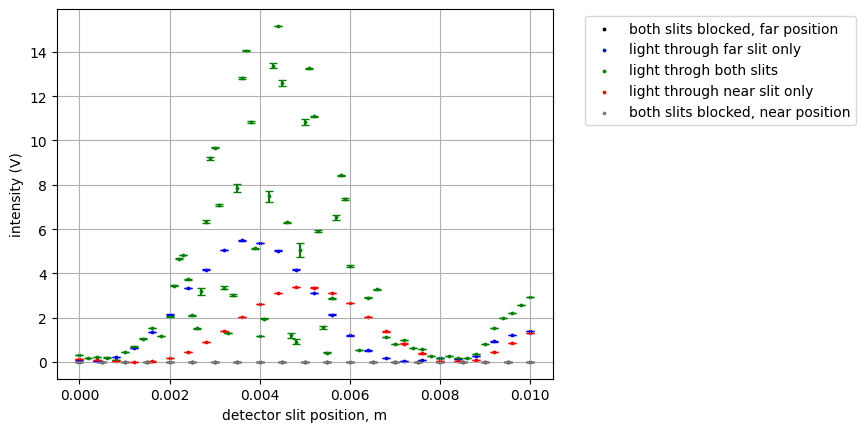

In [98]:
# plotting the laser data with error bars

labels = [
    'both slits blocked, far position',
    'light through far slit only',
    'light throgh both slits',
    'light through near slit only',
    'both slits blocked, near position'
]

colors = [
    'black',
    'blue',
    'green',
    'red',
    'gray'
]

for i in range(nlength):
    plt.scatter(
        pos[i], vavg[i],
        color=colors[i],
        label=labels[i],
        s=3
    )
    plt.errorbar(
        pos[i], vavg[i], yerr=verr[i],
        color=colors[i],
        ls='none',
        capsize=3
    )

plt.xlabel('detector slit position, m')
plt.ylabel('intensity (V)')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.grid()
plt.show()

# best fit function

For our model, we utilized the **Fraunhofer** model presented within the lab manual. This uses the assumption that the light will act as a plane wave from an infinitely far source. This assumption is for both before and after the light passes through the double-slit. The following is the **Fraunhofer** model equation: 

\begin{align*}
    I(0) = I_0(\cos{\beta})^2(\frac{\sin{\alpha}}{\alpha})^2 
\end{align*}

where:


- $\alpha = \frac{\pi a}{\lambda}\sin{\theta}$  
- $\beta = \frac{\pi d}{\lambda}\sin{\theta}$


and the following are the given constants:
- The slit-width: a = 0.085 mm
- Center-to-separation: d = 0.353 mm
- Laser wavelength:  $\lambda_{laser}$ = 0.670 $\pm$ 0.005 $\mu$ m
- Bulb wavelength:  $\lambda_{bulb}$ = 0.541 to 0.551 $\mu$ m


From this it can be assumed that the variable $\theta$ expresses the radiation pattern, yet we further this by finding the relation of:

\begin{align*}
    \theta = \arctan{\frac{x}{l}} + \phi
\end{align*}

where the position of the micrometer is $x$, the length of the chamber of travel is $l = 50 cm$, and $\phi$ is the phase shift parameter for the best fit.


In [120]:
# fit function

# two-slit
def ts_fcn(x, i0, d, a, l, wavelength, phi, bg):
    beta = ((np.pi * d)/wavelength) * np.sin(np.arctan2(x, l) + phi)
    alpha = ((np.pi * a)/wavelength) * np.sin(np.arctan2(x, l) + phi)
    return i0 * (np.cos(beta)**2 * (np.sin(alpha)/alpha)**2) + bg

# one-slit
def os_fcn(x, i0, a, l, wavelength, phi, bg):
    delta = (2 * np.pi * a * np.sin(np.arctan2(x, l) + phi)/wavelength)
    return i0 * ((np.sin(delta/2.0)**2)/(delta/2.0)**2) + bg

In [132]:
# fit the far slit one-slit diffraction pattern
i0 = 5.5
a = 0.085e-3
l = 0.5
wavelength = 0.670e-6
phi = -0.0098
bg = 0.1
guess = np.array([i0, a, l, wavelength, phi, bg])

popt_osf, pcov_osf = curve_fit(os_fcn, pos[1], vavg[1], p0=guess, maxfev=100000)

# fit the two-slit diffraction pattern
i0 = 15
d = 0.353e-3
a = 0.085e-3
l = 0.5
wavelength = 0.670e-6
phi = -0.0088
bg = 0.1
guess = np.array([i0, d, a, l, wavelength, phi, bg])

popt_ts, pcov_ts = curve_fit(ts_fcn, pos[2], vavg[2], p0=guess, maxfev=100000)

# fit the near slit one-slit diffraction pattern
i0 = 3.5
a = 0.085e-3
l = 0.5
wavelength = 0.670e-6
phi = -0.008
bg = 0.1
guess = np.array([i0, a, l, wavelength, phi, bg])

popt_osn, pcov_osn = curve_fit(os_fcn, pos[3], vavg[3], p0=guess, maxfev=100000)

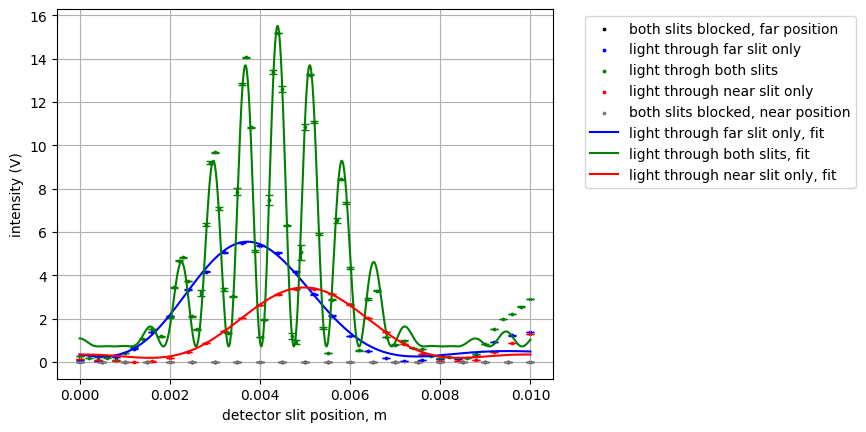

In [134]:
labels = [
    'both slits blocked, far position',
    'light through far slit only',
    'light throgh both slits',
    'light through near slit only',
    'both slits blocked, near position'
]

colors = [
    'black',
    'blue',
    'green',
    'red',
    'gray'
]

for i in range(nlength):
    plt.scatter(
        pos[i], vavg[i],
        color=colors[i],
        label=labels[i],
        s=3
    )
    plt.errorbar(
        pos[i], vavg[i], yerr=verr[i],
        color=colors[i],
        ls='none',
        capsize=3
    )

x = np.linspace(0,0.01,1000)
plt.plot(
    x, os_fcn(x, *popt_osf),
    color='blue',
    label='light through far slit only, fit'
)
plt.plot(
    x, ts_fcn(x, *popt_ts),
    color='green',
    label='light through both slits, fit'
)
plt.plot(
    x, os_fcn(x, *popt_osn),
    color='red',
    label='light through near slit only, fit'
)

plt.xlabel('detector slit position, m')
plt.ylabel('intensity (V)')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.grid()
plt.show()

In conclusion, our laser pattern looks super nice overall. There is some weirdness happening near x > 0.008 m (the readings go up much farther than we would expect). Also the intensity through the near slit is less than the intensity through the far slit, so perhaps we did not align our laser perfectly. 